In [1]:
from PIL import Image, ImageFilter
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, accuracy_score
from sklearn import metrics
from sklearn import cluster
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from glob import glob
import gensim

from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Flatten
from keras import Model
from keras import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras import layers
import tensorflow_hub as hub

from transformers import TFBertModel
from transformers import BertTokenizer

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, WordPunctTokenizer, RegexpTokenizer
from nltk.corpus import stopwords, words

sns.set_theme(style='darkgrid', palette='dark')

tf.get_logger().setLevel('ERROR')

In [2]:
path = './Projet6/Flipkart/'
data = pd.read_csv(path + "flipkart_com-ecommerce_sample_1050.csv")
data['try'] = data['product_category_tree']
data['try'] = data['try'].apply(lambda x: x.rsplit('>>')[0][2:-1])
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,try
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantr

In [3]:
def tokenize(doc,
             min_len=2,
             liste_words_to_delete=None,
             keep_doublons=True,
             force_alpha=True,
             lemm_or_stemm='lemm',
             english_only=True):
    """
    tokenizer with multiple parameters:
    
    Parameters
    ----------
    doc : str
        The string we want to tokenize
        
    min_len : int (default = 2)
        only consider words of size min_len or more
        
    liste_words_to_delete : list of str (default = None)
        provide a list of words we dont want after tokenise
        
    keep_doublons : bool (default = True)
        If we want to keep words that appears more than once
        
    force_alpha : bool (default = True)
        If we want to force words only (kill numbers basicly)
        
    lemm_or_stemm : 'lemm' or 'stemm'
        method to use to reduce a word to his root (exemple : meaning or meant will be changed to mean)
        extra info on the difference between the 2 : https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
        
    english_only : bool (default = True)
        Use the english dictionary if True.     
        
    
    Returns
    ----------
    tokens : list 
        return the list of tokens (one word string) from a document provided in doc
        
    """

    if isinstance(doc, pd.core.series.Series):
        doc = doc.values[0].lower()
    tk = RegexpTokenizer(r"\w+")
    tokens = tk.tokenize(doc.lower())
    stop_words = set(stopwords.words('english'))
    if not liste_words_to_delete:
        liste_words_to_delete = []
    tokens = [voc for voc in tokens if voc not in liste_words_to_delete]
    tokens = [voc for voc in tokens if voc not in stop_words]
    tokens = [voc for voc in tokens if len(voc) > min_len]
    if not keep_doublons:
        tokens = list(set(tokens))
    if force_alpha:
        tokens = [voc for voc in tokens if voc.isalpha()]
    if lemm_or_stemm == 'lemm':
        trans = WordNetLemmatizer()
        tokens = [trans.lemmatize(voc) for voc in tokens]
        english_dic = [trans.lemmatize(word.lower()) for word in words.words()]
    else:
        trans = PorterStemmer()
        tokens = [trans.stem(voc) for voc in tokens]
        english_dic = [trans.stem(word.lower()) for word in words.words()]
    if english_only:
        tokens = [voc for voc in tokens if voc in english_dic]

    return tokens


def delete_and_save_words(tokens, nb_min_appearance):
    count_token = pd.Series(tokens).value_counts()
    pd.DataFrame({'words': count_token[count_token <= nb_min_appearance].index}).to_csv(
        path + f'data_cleaned/words_appearing_{nb_min_appearance}_times.csv')
    return count_token[count_token > nb_min_appearance].index.to_list()


def liste_words_appearing_n_times(tokens, n):
    count_token = pd.Series(tokens).value_counts()
    return count_token[count_token == n].index.to_list()


def reshape_comme_je_veux(a):
    reshaped1 = []
    reshaped2 = []
    for i in a:
        reshaped1.append(i[0])
        reshaped2.append(i[1])
    return [reshaped1, reshaped2]


def test_model(feature):
    """
    Takes a feature vector of shape (number_of_data, feature_vector_for_each_data)
    Reduce the dimentions of that vector to (number_of_data, 2) with a PCA into a TSNE for time optimisation
    ScatterPlot this vector with 2 different labels :
        - On the left, the true value of the 7 category we try to predict
        - On the right, a clustering with kmean(k = 7) on the (number_of_data, 2) vector.
    The purpose is to compare how accurate is the feature vector to represent the datas in order to implement a classification
    using the method used to create the feature vector.
    
    Parameters
    ----------
    feature : numpy array 
        required shape : (nb_data, nb_feature_for_each_data)
    
    returns
    ----------
    None 
        print a pyplot figure without returning any values        
    
    """
    
    pca = PCA(n_components=0.99)
    feature = pca.fit_transform(feature)
    tsne = TSNE(n_components=2,
                perplexity=50,
                learning_rate=500,
                n_iter=3000,
                init='random')
    X_tsne = tsne.fit_transform(feature)
    cls = cluster.KMeans(n_clusters=7)
    cls.fit(X_tsne)

    fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

    plt.sca(ax[0])
    sns.scatterplot(reshape_comme_je_veux(X_tsne)[0],
                    reshape_comme_je_veux(X_tsne)[1],
                    hue=data['try'])
    plt.legend(bbox_to_anchor=(0.5, -0.2), borderaxespad=0)
    plt.title("Scatterplot of descriptions in 2 first componant of TSNE")
    plt.xlabel("F1")
    plt.ylabel("F2")

    plt.sca(ax[1])
    sns.scatterplot(reshape_comme_je_veux(X_tsne)[0],
                    reshape_comme_je_veux(X_tsne)[1],
                    hue=cls.labels_)

    plt.legend(bbox_to_anchor=(0.5, -0.2), borderaxespad=0)
    plt.title("Scatterplot of descriptions in 2 first componant of TSNE")
    plt.xlabel("F1")
    plt.ylabel("F2")
    rs = metrics.adjusted_rand_score(data['try'], cls.labels_)

    print(f'randscore du modèle par rapport au clustering : {rs}')




In [4]:
corpus = [tokenize(i) for i in data['description']]
corpus2 = [tokenize(i) for i in data['product_name']]
corpus

[['key',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'height',
  'pack',
  'price',
  'curtain',
  'look',
  'interior',
  'curtain',
  'made',
  'high',
  'quality',
  'polyester',
  'fabric',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morning',
  'whole',
  'world',
  'draw',
  'close',
  'evening',
  'create',
  'spe

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


randscore du modèle par rapport au clustering : 0.36936431475786224


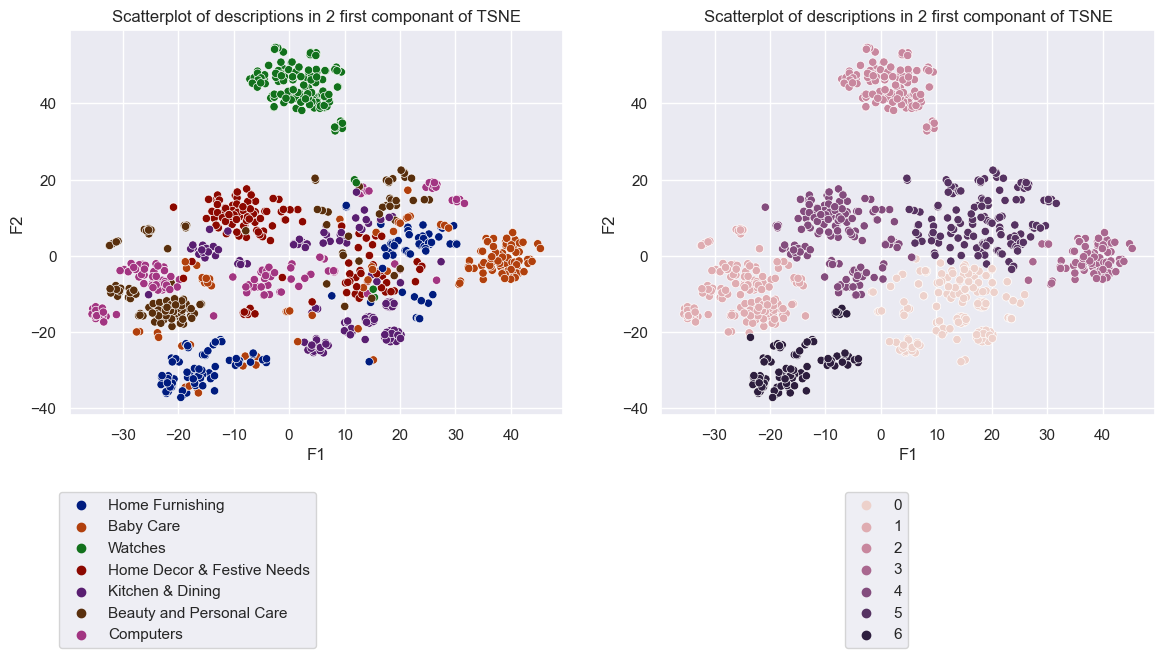

In [5]:
# First methode we try : tfid (term frequency-inverse document frequency).
# this methode use both the frequency of a word into the hole corpus of the 1050 description the data provide and on 
# the specific document we are studying. This method let the featuring takes in consideration how common a word is in
# a set of documents to spot the more important words that woudl describe specificly the document.
# final feature_vector is size (number_of_documents, number_of_words_in_corpus)

tfv = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=1000,
    ngram_range=(
        1,
        1))
tf = tfv.fit_transform(data.description.values)
test_model(tf.toarray())

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


randscore du modèle par rapport au clustering : 0.36619335999434766


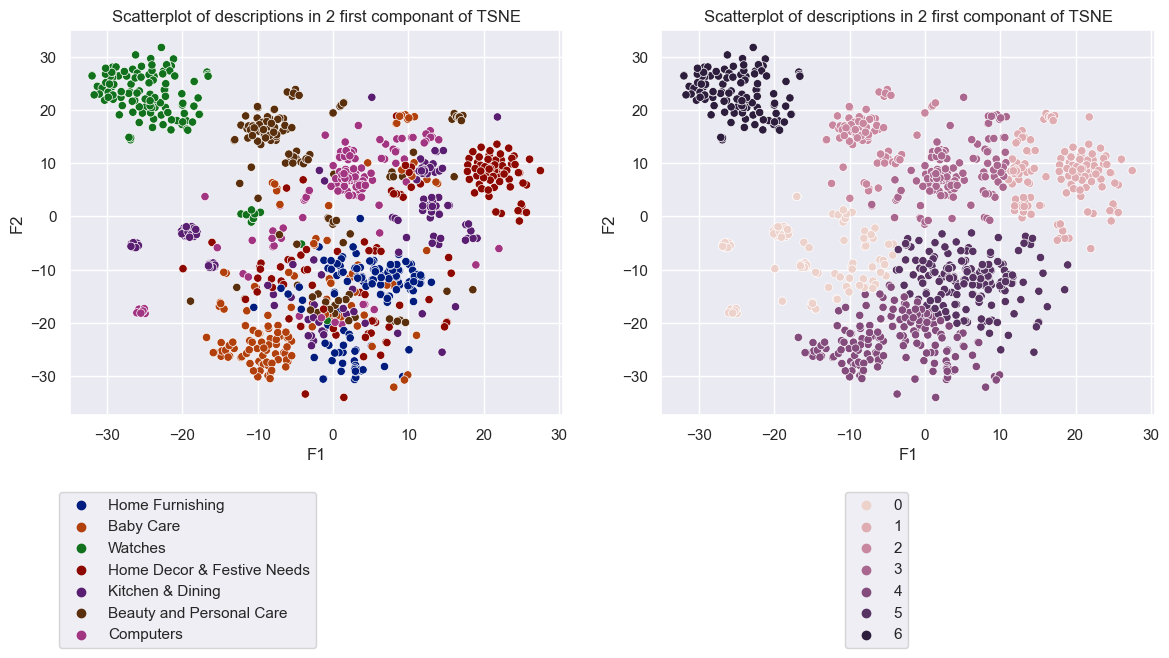

In [6]:
# CountVectorizer is kinda self explanatory : after making the tokenisation of all corpus of 1050 documents,
# it just count the number of appearance of each word of a documents.
# final feature_vector is size (number_of_documents, number_of_words_in_corpus)

cv = CountVectorizer()
test = cv.fit_transform(data.description.values)
test_model(test.toarray())

C:\Users\Eric\AppData\Local\Temp\ipykernel_14820\1098127130.py:99: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(get_value(i) for i in sentence)
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


randscore du modèle par rapport au clustering : 0.26014216316075467


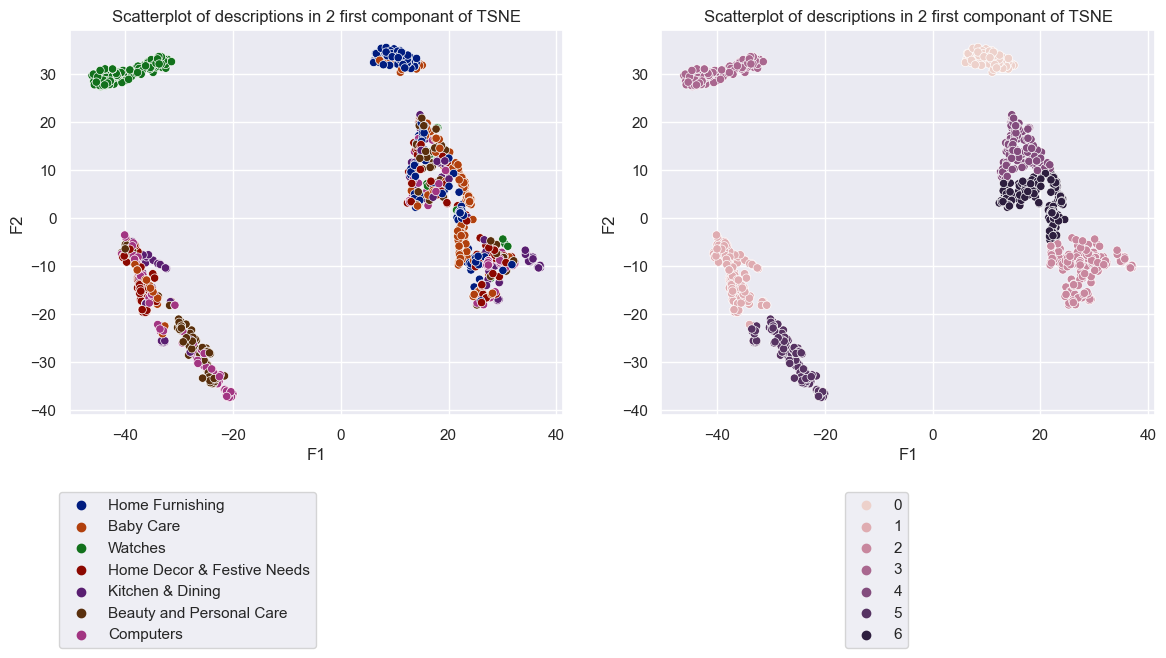

In [7]:
# Word2vec method try to feature each words in the corpus in order to allow operation between the words.
# Usual exemple would be to say vectorized("Queen") + vectorized("Male")  = vectorized("King")
# We give Word2vec the corpus of words to vectorize. We will try to setup 2 different ways :
#     - on corpus made of decriptions of the product
#     - on corpus2 made of name of the product
# the min_count value is the minimum number of time the word have to appear in corpus to be vectorize.

# The final feature is a vector made of the sum of the vectorisation made by word2vec of each word of a document thats is
# vectorized (the one not vectorized adds 0)

def get_value(word):
    try:
        model.wv[word]
        return model.wv[word]
    except KeyError:
        return np.zeros(100)


def phrase_vector(sentence):
    return np.sum(get_value(i) for i in sentence)


def corpus_vectorize(corpus):
    return [phrase_vector(i) for i in corpus]

model = gensim.models.Word2Vec(sentences=corpus, min_count=7)
corpus_vect = np.array(corpus_vectorize(corpus))
test_model(corpus_vect)

C:\Users\Eric\AppData\Local\Temp\ipykernel_14820\1098127130.py:99: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(get_value(i) for i in sentence)
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


randscore du modèle par rapport au clustering : 0.2626959351715838


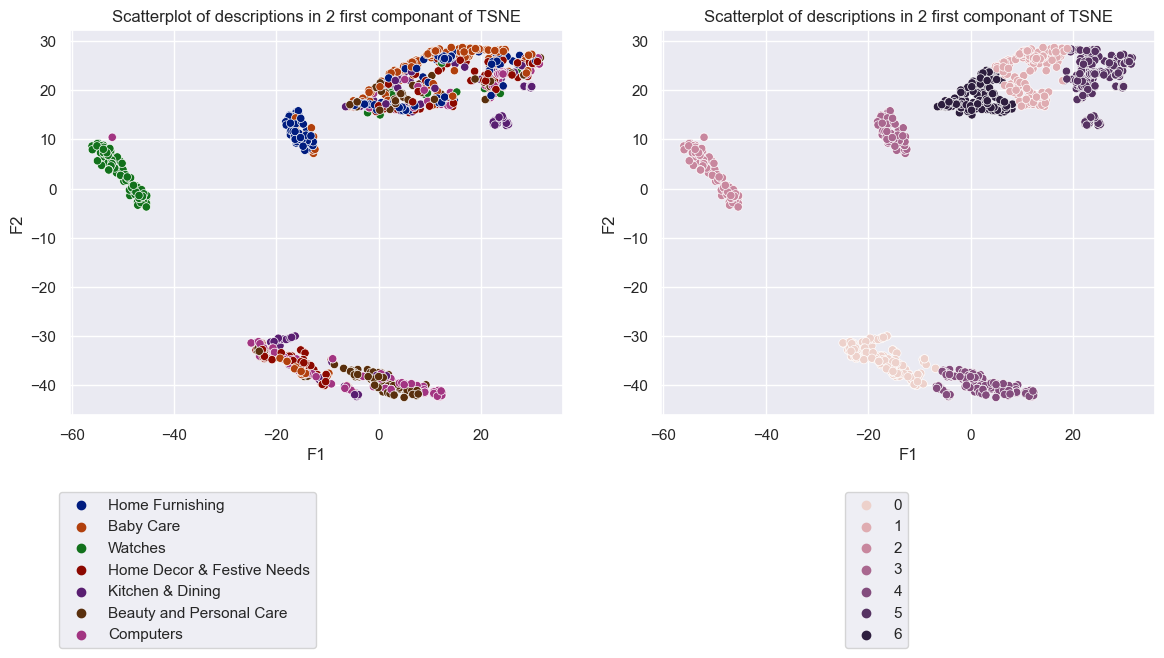

In [80]:
# 2nd try with a lower min_count, still with corpus witch is made of the descriptions of products:

model = gensim.models.Word2Vec(sentences=corpus, min_count=4)
corpus_vect = np.array(corpus_vectorize(corpus))
test_model(corpus_vect)

C:\Users\Eric\AppData\Local\Temp\ipykernel_14820\1098127130.py:99: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(get_value(i) for i in sentence)
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


randscore du modèle par rapport au clustering : 0.30745130636053064


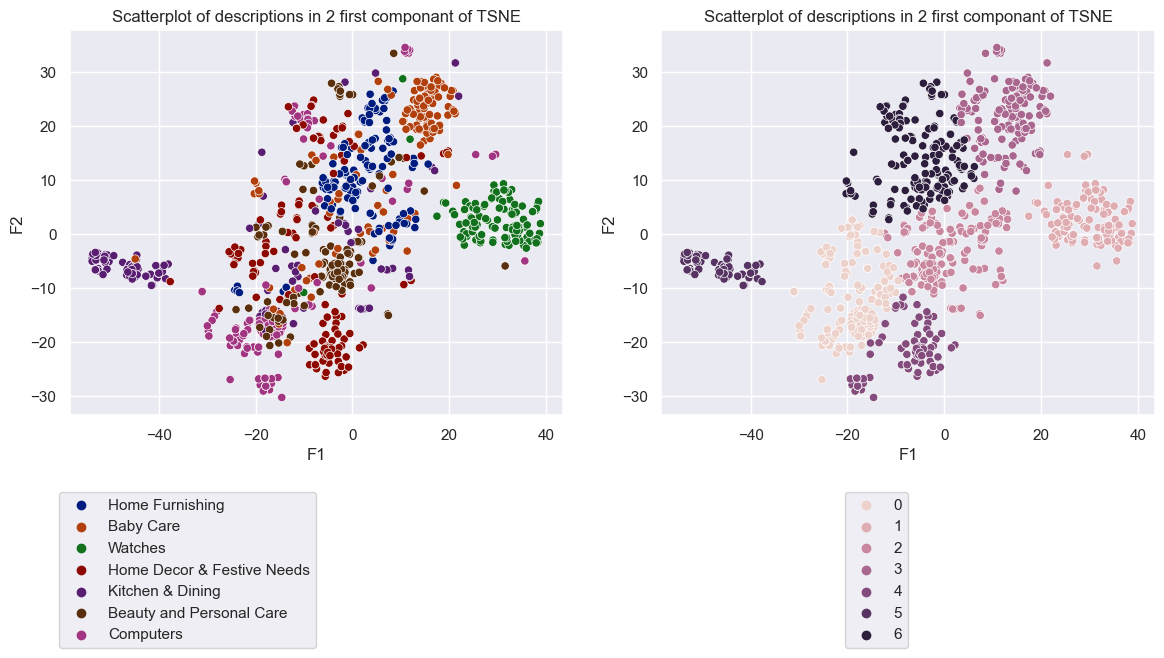

In [8]:
# 3rd try using the copus2 made from products name.
# Note that the score is better at the end, cause we reduced the list of words we vectorized. Only
# important words that describe the product (present in the name) are used to predict.

model = gensim.models.Word2Vec(sentences=corpus2, min_count=7)
corpus_vect = np.array(corpus_vectorize(corpus))
test_model(corpus_vect)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defa

randscore du modèle par rapport au clustering : 0.22849047530696506


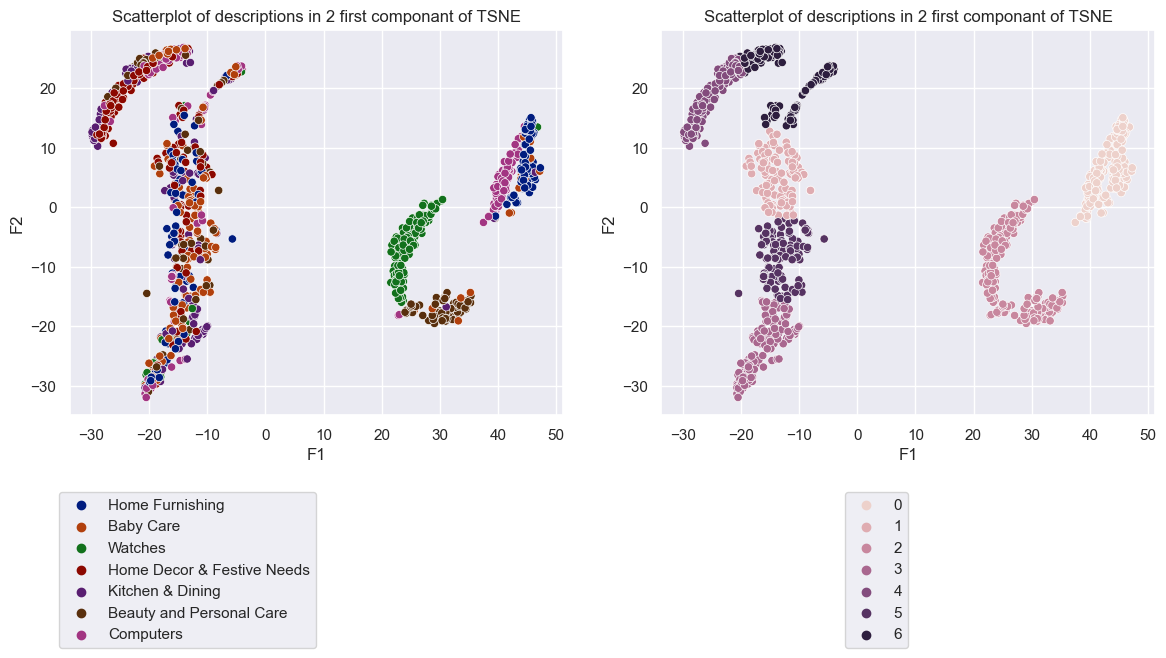

In [56]:
# Another approach is the BERT method. BERT is a neral network based model with a 768 dimentions output.
# We will show with the image featuring using VGG16 how to add dense and softmax output to reduce the output dimentions
# the way we want (here, 7 category)
# For now we will use BERT embedding capacity to create a (nb_of_documents, 768) feature vector. 
# Side note : Bert tokens are specific (as a pre-trained model, words already have a numeric value to feed BERTmodel)
# We cant use our own tokinezer, we will load their own.

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = TFBertModel.from_pretrained('bert-base-cased')

bert_tokens = [tokenizer(i, return_tensors="tf", max_length=500)
               for i in data['description']]
outputs = [model(i) for i in bert_tokens]
feature_bert = []
for i in outputs:
    feature_bert.append(i[1].numpy())
feature_bert = np.array(feature_bert).reshape((1050, 768))
test_model(feature_bert)

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


randscore du modèle par rapport au clustering : 0.4370558521148791


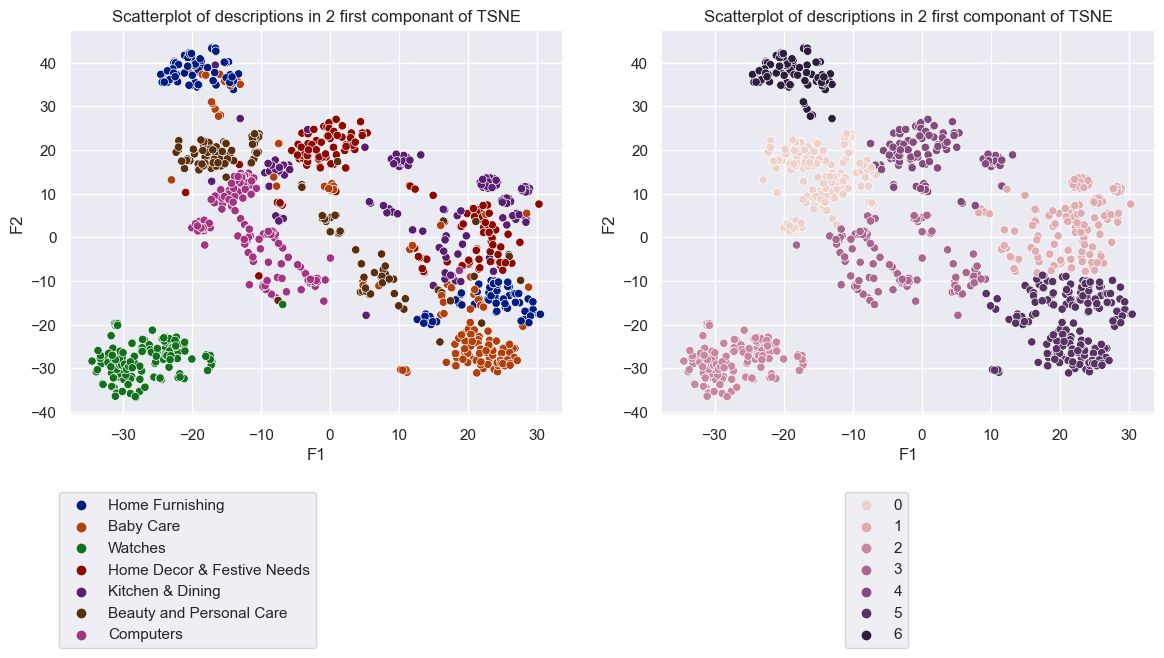

In [78]:
# A last embedding method with pre-entrained model : Universal Sentence Encoder
# It provide 512 values for each sentence
encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
features = [encoder([i]).numpy() for i in data['description']]
features = np.array(features).reshape((1050, 512))
test_model(features)

C:\Users\Eric\AppData\Local\Temp\ipykernel_14820\1887187281.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_descripteur_par_image = np.asarray(list_descripteur_par_image)
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

randscore du modèle par rapport au clustering : 0.0815179592847556


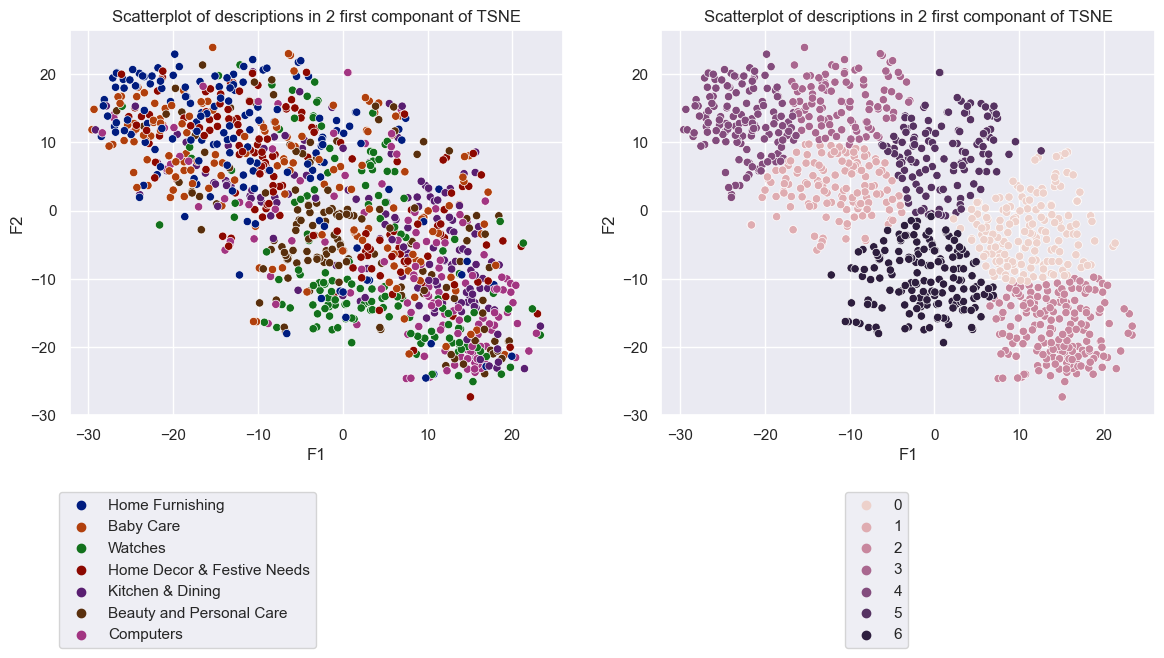

In [9]:
# Etudions maintenant la classification par les images. La première méthode mise en place est la méthode SIFT.
# Nous allons étuider la faisabilité de la classification, comme précédement.
# L'algo SIFT permet de récuperer sur une image des descripteurs qui caractérise l'image.
# On récupère donc cette liste de descripteurs par image, puis sur l'ensemble du corpus d'image :

list_descripteur_par_image = []
sift = cv2.SIFT_create()
for i in data['image']:
    img = cv2.imread(path + "/Images/" + i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equa = cv2.equalizeHist(gray)
    kp, des = sift.detectAndCompute(equa, None)
    list_descripteur_par_image.append(des)
list_descripteur_par_image = np.asarray(list_descripteur_par_image)
sift_keypoints_all = np.concatenate(list_descripteur_par_image, axis=0)

# Pour featurer l'ensemble de descripteur et de keypoint obtenus sur l'ensemble des images, 
# On va réduire la dimension par un simple clustering sur les descripteurs pour ranger ensemble les descipteurs similaires. 
# Ensuite, pour chaque cluster ainsi crée, et pour chaque image, on va compter le nombre de 
# descripteur présent dans l'image pour chaque cluster.
# Ce comptage de taille (nb_image, nb_cluster) sera notre vecteur feature de l'image.

k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3 * k, random_state=0)
kmeans.fit(sift_keypoints_all)

del sift_keypoints_all

hist_vector = []
for i in list_descripteur_par_image:
    hist = np.zeros(len(kmeans.cluster_centers_))
    kpred = kmeans.predict(i)
    unique, count = np.unique(kpred, return_counts=True)
    for k in range(unique.shape[0]):
        hist[unique[k]] = count[k]
    hist_vector.append(hist)
feature = np.asarray(hist_vector)

del list_descripteur_par_image
del hist_vector

test_model(feature)

C:\Users\Eric\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

randscore du modèle par rapport au clustering : 0.36566133017737806


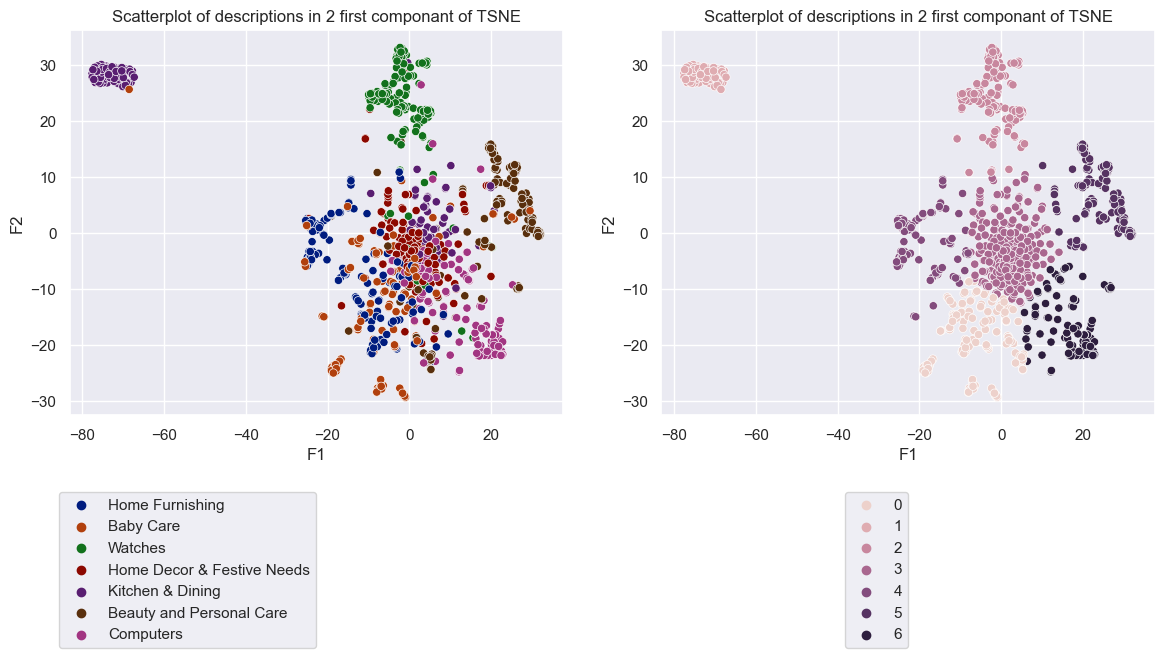

In [4]:
# Etudions maintenant la faisabilité avec un modèle préentrainé : le VGG16
# Le VGG16 est un réseau de neurone principalement composé de 2 types de couches :
#      -couches de convolution, donc de filtrage d'image, qui convolue l'image avec 
#       des descripteurs (eux même apris à partir des images par le réseau de neurone)
#      -couches de pooling qui réduit la dimension après une convolution
# Nous allons dans un premier temps l'utiliser avec sa sortie par défaut, la couche fully-connected, à 1000 valeurs :

model = VGG16()
feature_image = []
for i in data['image']:
    img = load_img(path + "/Images/" + i, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    feature_image.append(model.predict(img, verbose=0))
feature_image = np.asarray(feature_image).reshape(1050, 1000)
test_model(feature_image)

In [77]:
# Contrairement aux données texte, nous allons cette fois chercher à crée un classificateur à partir du VGG16.
# Commençons par séparer les données en train/test :

data['label'] = data['try']
data['label'].replace(data['try'].unique(),
                      value=range(7),
                      inplace=True)
imgpack = []

for i in data['image']:
    img = load_img(path + "/Images/" + i, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    imgpack.append(img)
imgpack = np.array(imgpack)

xtrain, xtest, ytrain, ytest = train_test_split(
    imgpack, data['label'], test_size=0.33)

# Pour la suite, nous aurons besoin des targets non pas de 0 à 7 mais sous la forme d'un vecteur de taille 7 de 0 et 1 :
ytrain2 = to_categorical(ytrain, 7)
ytest2 = to_categorical(ytrain, 7)

del imgpack

# La métrique 'accuracy' dans le cas d'une classification fais le calcul cas_predit_correctement/total
# Cependant, le paradoxe de simpson est présent : individuellement, chaque catégorie à un accuracy score bien plus élevé 
# que l'accuracy score sur l'ensemble. Nous étudirons donc les deux, ainsi que les ROC curves / les AUC.

def accuracy_one_class(confusion_matrice, category):
    TP = confusion_matrice.loc[category, category]
    FP = confusion_matrice.loc[category, 'Total réel'] - TP
    FN = confusion_matrice.loc['total predit', category] - TP
    TN = confusion_matrice.loc['total predit', 'Total réel'] - confusion_matrice.loc[category,'Total réel'] - FN
    print("_______________________________________________________")
    print(f'accuracy for the class {category} = {round((FP+TN)/(TP + FP + FN + TN), 3)}')
    conf = pd.DataFrame()
    conf['real category'] = [f'is really {category}',f'is really not {category}']
    conf[f'is predicted {category}'] = [TP, FP]
    conf[f'is not predicted {category}'] = [FN, TN]
    conf.set_index('real category', inplace = True)
    return conf
    

In [113]:
base_model = VGG16()
model = Sequential()
# On récupère les layers du VGG16 sauf la dernière couche, celle de prédiction
for layer in base_model.layers[:-1]:
    model.add(layer)
# On bloque l'ensemble des layers, puis on ajoute des couches denses jusqu'aà en avoir 7.
for layer in model.layers:
    layer.trainable = False
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(
    np.array(xtrain),
    ytrain2,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    verbose=0)


ypred = model.predict(xtest)

predict = []
for i in ypred:
    predict.append(np.argmax(i))

acc = metrics.accuracy_score(ytest, predict)

print(f'précision du modèle valeurs prédite vs réelle valeurs : {acc}')

11/11 [==============================] - 44s 4s/step
précision du modèle valeurs prédite vs réelle valeurs : 0.8126801152737753


In [114]:
# Et pour finir, la matrice de confusion :

confusion = pd.DataFrame(
    metrics.confusion_matrix(
        ytest,
        predict,
        labels=list(
            dic.keys())),
    columns=dic.values(),
    index=dic.values())
confusion['Total réel'] = confusion.sum(axis=1)
confusion.loc[7] = [confusion[i].sum() for i in confusion.columns]
confusion.reset_index(inplace=True)
confusion.iloc[7, 0] = 'total predit'
confusion.set_index('index', inplace=True)
confusion

,Home Furnishing,Baby Care,Watches,Home Decor & Festive Needs,Kitchen & Dining,Beauty and Personal Care,Computers,Total réel
index,,,,,,,,
Home Furnishing,39,2,0,2,0,1,0,44
Baby Care,12,30,0,2,4,2,0,50
Watches,0,0,50,0,0,0,3,53
Home Decor & Festive Needs,0,5,2,39,3,1,0,50
Kitchen & Dining,0,2,0,1,40,1,1,45
Beauty and Personal Care,5,1,1,3,1,40,6,57
Computers,0,0,0,2,0,2,44,48
total predit,56,40,53,49,48,47,54,347


In [115]:
confusion_no_augmentation = confusion.copy()
for i in confusion_no_augmentation.columns[:-1]:
    display(accuracy_one_class(confusion_no_augmentation, i))

_______________________________________________________
accuracy for the class Home Furnishing = 0.839


,is predicted Home Furnishing,is not predicted Home Furnishing
real category,,
is really Home Furnishing,39,17
is really not Home Furnishing,5,286


_______________________________________________________
accuracy for the class Baby Care = 0.885


,is predicted Baby Care,is not predicted Baby Care
real category,,
is really Baby Care,30,10
is really not Baby Care,20,287


_______________________________________________________
accuracy for the class Watches = 0.847


,is predicted Watches,is not predicted Watches
real category,,
is really Watches,50,3
is really not Watches,3,291


_______________________________________________________
accuracy for the class Home Decor & Festive Needs = 0.859


,is predicted Home Decor & Festive Needs,is not predicted Home Decor & Festive Needs
real category,,
is really Home Decor & Festive Needs,39,10
is really not Home Decor & Festive Needs,11,287


_______________________________________________________
accuracy for the class Kitchen & Dining = 0.862


,is predicted Kitchen & Dining,is not predicted Kitchen & Dining
real category,,
is really Kitchen & Dining,40,8
is really not Kitchen & Dining,5,294


_______________________________________________________
accuracy for the class Beauty and Personal Care = 0.865


,is predicted Beauty and Personal Care,is not predicted Beauty and Personal Care
real category,,
is really Beauty and Personal Care,40,7
is really not Beauty and Personal Care,17,283


_______________________________________________________
accuracy for the class Computers = 0.844


,is predicted Computers,is not predicted Computers
real category,,
is really Computers,44,10
is really not Computers,4,289


In [122]:
for i in confusion_no_augmentation.columns[:-1]:
    accuracy_one_class(confusion_no_augmentation, i)

_______________________________________________________
accuracy for the class Home Furnishing = 0.839
_______________________________________________________
accuracy for the class Baby Care = 0.885
_______________________________________________________
accuracy for the class Watches = 0.847
_______________________________________________________
accuracy for the class Home Decor & Festive Needs = 0.859
_______________________________________________________
accuracy for the class Kitchen & Dining = 0.862
_______________________________________________________
accuracy for the class Beauty and Personal Care = 0.865
_______________________________________________________
accuracy for the class Computers = 0.844


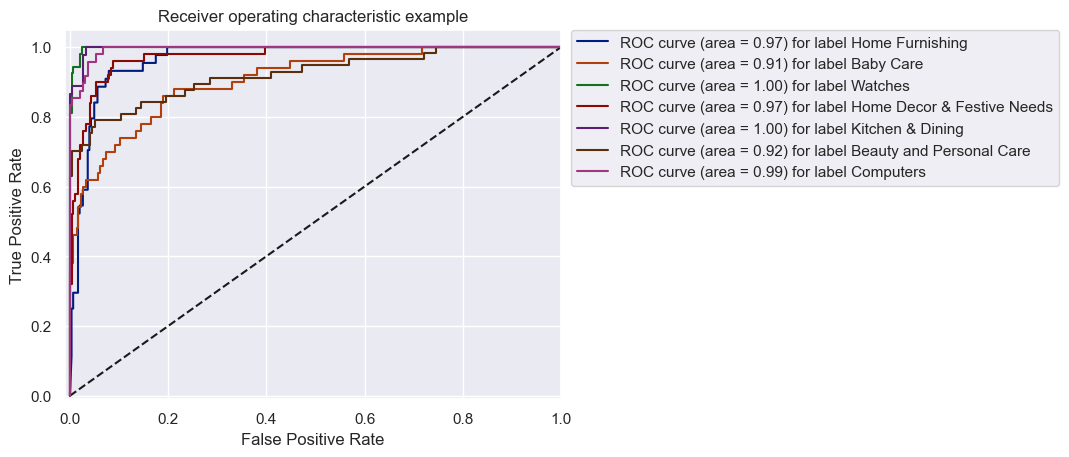

In [116]:
# En plus de l'accuracy, regardons les roc curves des différentes catégories :

dic = {}
for i in data['try'].unique():
    dic[list(data.loc[data['try'] == i]['label'])[0]] = i
fpr = {}
tpr = {}
trh = {}
roc_auc = {}

y_test_dummies = pd.get_dummies(ytest, drop_first=False).values

for i in range(7):
    fpr[i], tpr[i], trh[i] = roc_curve(y_test_dummies[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([-0.01, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for each class')
for i in range(7):
    ax.plot(
        fpr[i],
        tpr[i],
        label=f'ROC curve (area = {roc_auc[i]:0.2f}) for label {dic[i]}')
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

In [117]:
# Ajoutons maintenant des couches en amont de data augmentation : 

base_model = VGG16()

data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical",
                          input_shape=(224,
                                       224,
                                       3)),
        layers.RandomRotation(factor = (-0.1, 0.1)),
        layers.RandomZoom(height_factor = (0,0.1), width_factor = (0,0.1)),
    ]
)


model = Sequential()
model.add(data_augmentation)
for layer in base_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    xtrain,
    ytrain2,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    verbose=0)

ypred = model.predict(xtest)

predict = []
for i in ypred:
    predict.append(np.argmax(i))

acc = metrics.accuracy_score(ytest, predict)

print(f'précision du modèle valeurs prédite vs réelle valeurs : {acc}')

11/11 [==============================] - 48s 4s/step
précision du modèle valeurs prédite vs réelle valeurs : 0.7838616714697406


In [118]:
# Et pour finir, la matrice de confusion :

confusion = pd.DataFrame(
    metrics.confusion_matrix(
        ytest,
        predict,
        labels=list(
            dic.keys())),
    columns=dic.values(),
    index=dic.values())
confusion['Total réel'] = confusion.sum(axis=1)
confusion.loc[7] = [confusion[i].sum() for i in confusion.columns]
confusion.reset_index(inplace=True)
confusion.iloc[7, 0] = 'total predit'
confusion.set_index('index', inplace=True)
confusion

,Home Furnishing,Baby Care,Watches,Home Decor & Festive Needs,Kitchen & Dining,Beauty and Personal Care,Computers,Total réel
index,,,,,,,,
Home Furnishing,37,4,0,1,1,1,0,44
Baby Care,14,25,0,2,5,3,1,50
Watches,0,0,47,0,0,1,5,53
Home Decor & Festive Needs,3,2,1,40,2,2,0,50
Kitchen & Dining,0,0,0,1,40,4,0,45
Beauty and Personal Care,4,1,0,3,0,43,6,57
Computers,0,1,0,2,0,5,40,48
total predit,58,33,48,49,48,59,52,347


In [119]:
for i in confusion.columns[:-1]:
    display(accuracy_one_class(confusion, i))

_______________________________________________________
accuracy for the class Home Furnishing = 0.833


,is predicted Home Furnishing,is not predicted Home Furnishing
real category,,
is really Home Furnishing,37,21
is really not Home Furnishing,7,282


_______________________________________________________
accuracy for the class Baby Care = 0.905


,is predicted Baby Care,is not predicted Baby Care
real category,,
is really Baby Care,25,8
is really not Baby Care,25,289


_______________________________________________________
accuracy for the class Watches = 0.862


,is predicted Watches,is not predicted Watches
real category,,
is really Watches,47,1
is really not Watches,6,293


_______________________________________________________
accuracy for the class Home Decor & Festive Needs = 0.859


,is predicted Home Decor & Festive Needs,is not predicted Home Decor & Festive Needs
real category,,
is really Home Decor & Festive Needs,40,9
is really not Home Decor & Festive Needs,10,288


_______________________________________________________
accuracy for the class Kitchen & Dining = 0.862


,is predicted Kitchen & Dining,is not predicted Kitchen & Dining
real category,,
is really Kitchen & Dining,40,8
is really not Kitchen & Dining,5,294


_______________________________________________________
accuracy for the class Beauty and Personal Care = 0.83


,is predicted Beauty and Personal Care,is not predicted Beauty and Personal Care
real category,,
is really Beauty and Personal Care,43,16
is really not Beauty and Personal Care,14,274


_______________________________________________________
accuracy for the class Computers = 0.85


,is predicted Computers,is not predicted Computers
real category,,
is really Computers,40,12
is really not Computers,8,287


In [121]:
for i in confusion.columns[:-1]:
    accuracy_one_class(confusion, i)

_______________________________________________________
accuracy for the class Home Furnishing = 0.833
_______________________________________________________
accuracy for the class Baby Care = 0.905
_______________________________________________________
accuracy for the class Watches = 0.862
_______________________________________________________
accuracy for the class Home Decor & Festive Needs = 0.859
_______________________________________________________
accuracy for the class Kitchen & Dining = 0.862
_______________________________________________________
accuracy for the class Beauty and Personal Care = 0.83
_______________________________________________________
accuracy for the class Computers = 0.85


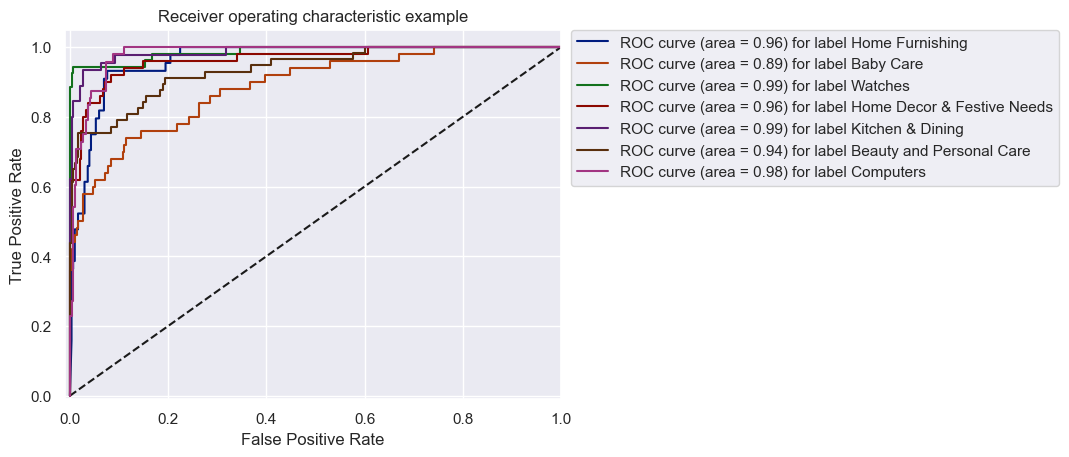

In [120]:
# En plus de l'accuracy, regardons les roc curves des différentes catégories :

dic = {}
for i in data['try'].unique():
    dic[list(data.loc[data['try'] == i]['label'])[0]] = i
fpr = {}
tpr = {}
trh = {}
roc_auc = {}

y_test_dummies = pd.get_dummies(ytest, drop_first=False).values

for i in range(7):
    fpr[i], tpr[i], trh[i] = roc_curve(y_test_dummies[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([-0.01, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for each class')
for i in range(7):
    ax.plot(
        fpr[i],
        tpr[i],
        label=f'ROC curve (area = {roc_auc[i]:0.2f}) for label {dic[i]}')
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()
